In [2]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
#you can find the model at https://github.com/serengil/tensorflow-101/blob/master/model/facenet_model.json
model = model_from_json(open("facenet_model.json", "r").read())

#you can find the pre-trained weights at https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing
model.load_weights('facenet_weights.h5')

#both model and pre-trained weights are inspired from the work of David Sandberg (github.com/davidsandberg/facenet)
#and transformed by Sefik Serengil (sefiks.com)

In [11]:
#model.summary()

In [3]:
def preprocess_image(img):
    #img = load_img(image_path, target_size=(160, 160))
    #img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [4]:
def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [7]:
metric = "euclidean" #euclidean or cosine

threshold = 0
if metric == "euclidean":
    threshold = 0.55
elif metric == "cosine":
    threshold = 0.07

def verifyFace(img1, img2):
    
    img1 = img1.astype('float32')
    img1 = img1-255/2
    #img1 = np.expand_dims(img1, axis=0)
    #img1 = preprocess_input(img1)
    img1_representation = model.predict(img1)[0,:]
    #img2_representation = model.predict(preprocess_image('/home/kuanysh/Desktop/facenet verification/dataset/%s' % (img2)))[0,:]
    
    img2 = img2.astype('float32')
    img2 = img2-255/2  
    #img1 = np.expand_dims(img1, axis=0)
    #img1 = preprocess_input(img1)
    img2_representation = model.predict(img2)[0,:]
    
    if metric == "euclidean":
        img1_representation = l2_normalize(img1_representation)
        img2_representation = l2_normalize(img2_representation)

        euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
        #print("euclidean distance (l2 norm): ",euclidean_distance)

        if euclidean_distance < threshold:
            return euclidean_distance
        else:
            return euclidean_distance
            
    elif metric == "cosine":
        cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
        #print("cosine similarity: ",cosine_similarity)

        if cosine_similarity < 0.07:
            return cosine_similarity
        else:
            return cosine_similarity
    
    print("-----------------------------------------")

(1, 160, 160, 3)
(1, 160, 160, 3)
cosine similarity:  0.045657217502593994
verified... they are same person


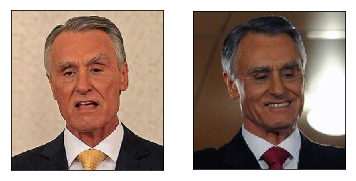

-----------------------------------------


In [32]:
#true positive
verifyFace("0001_01.jpg", "0002_01.jpg")
#verifyFace("1.jpg", "7.jpg")

In [12]:
import cv2
import sys


faceCascade = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
(width, height) = (160, 160)
img1=cv2.imread('dataset/img1.jpg')
img1=cv2.resize(img1, (width, height))
img1.shape
img1=img1.reshape(1,160,160,3)
video_capture = cv2.VideoCapture(0)

                 
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        frame,
        scaleFactor=1.1,
        minNeighbors=5
        #minSize=(160, 160),
        #flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        rrec = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face = frame[y:y + h, x:x + w] 
        face_resize = cv2.resize(face, (width, height))
        face_resize.shape
        face_resize = face_resize.reshape(1,160,160,3)
        text = verifyFace(face_resize, img1)
        text=str(text)
        cv2.putText(rrec,text,(100,100), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),1,cv2.LINE_AA)
        
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [15]:
import cv2
face_resize=cv2.imread('dataset/0002_01.jpg')

print(face_resize.shape)

(239, 230, 3)


In [2]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(160, 160))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img.shape

In [5]:
preprocess_image('dataset/0002_01.jpg')

(1, 160, 160, 3)